In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, cluster
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\haris\Downloads\Retail Dataset\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.isnull().values.any()

True

In [7]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [8]:
df.shape

(541909, 8)

In [9]:
df=df.dropna()

In [10]:
df.shape

(406829, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df["TotalPrice"] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
TotalPrice      4041
dtype: int64

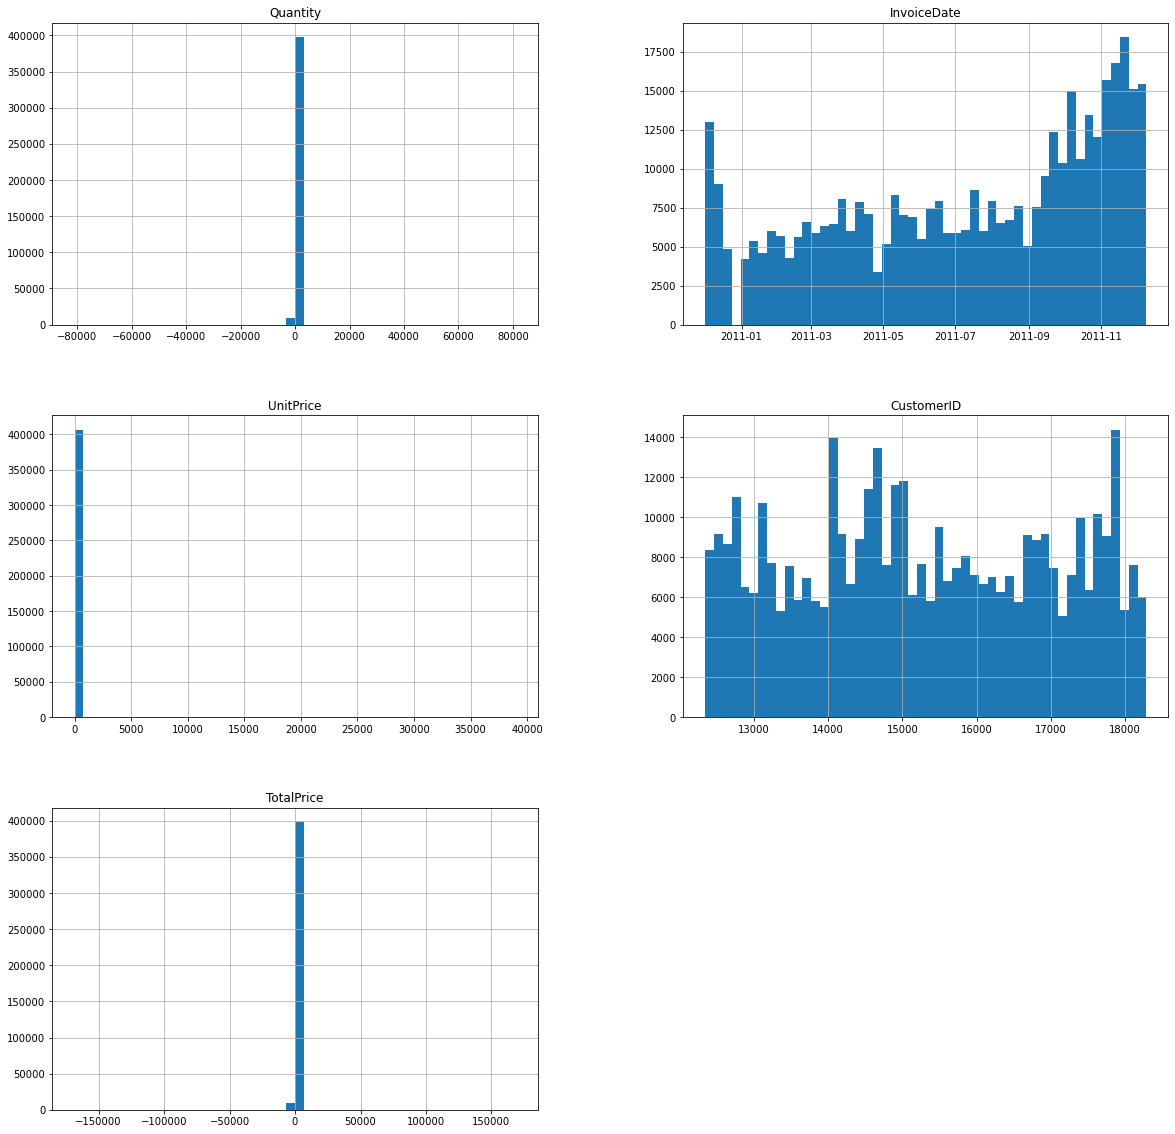

In [17]:
df.hist(figsize=[20,20],bins=50)
plt.show()

<AxesSubplot:xlabel='CustomerID', ylabel='InvoiceDate'>

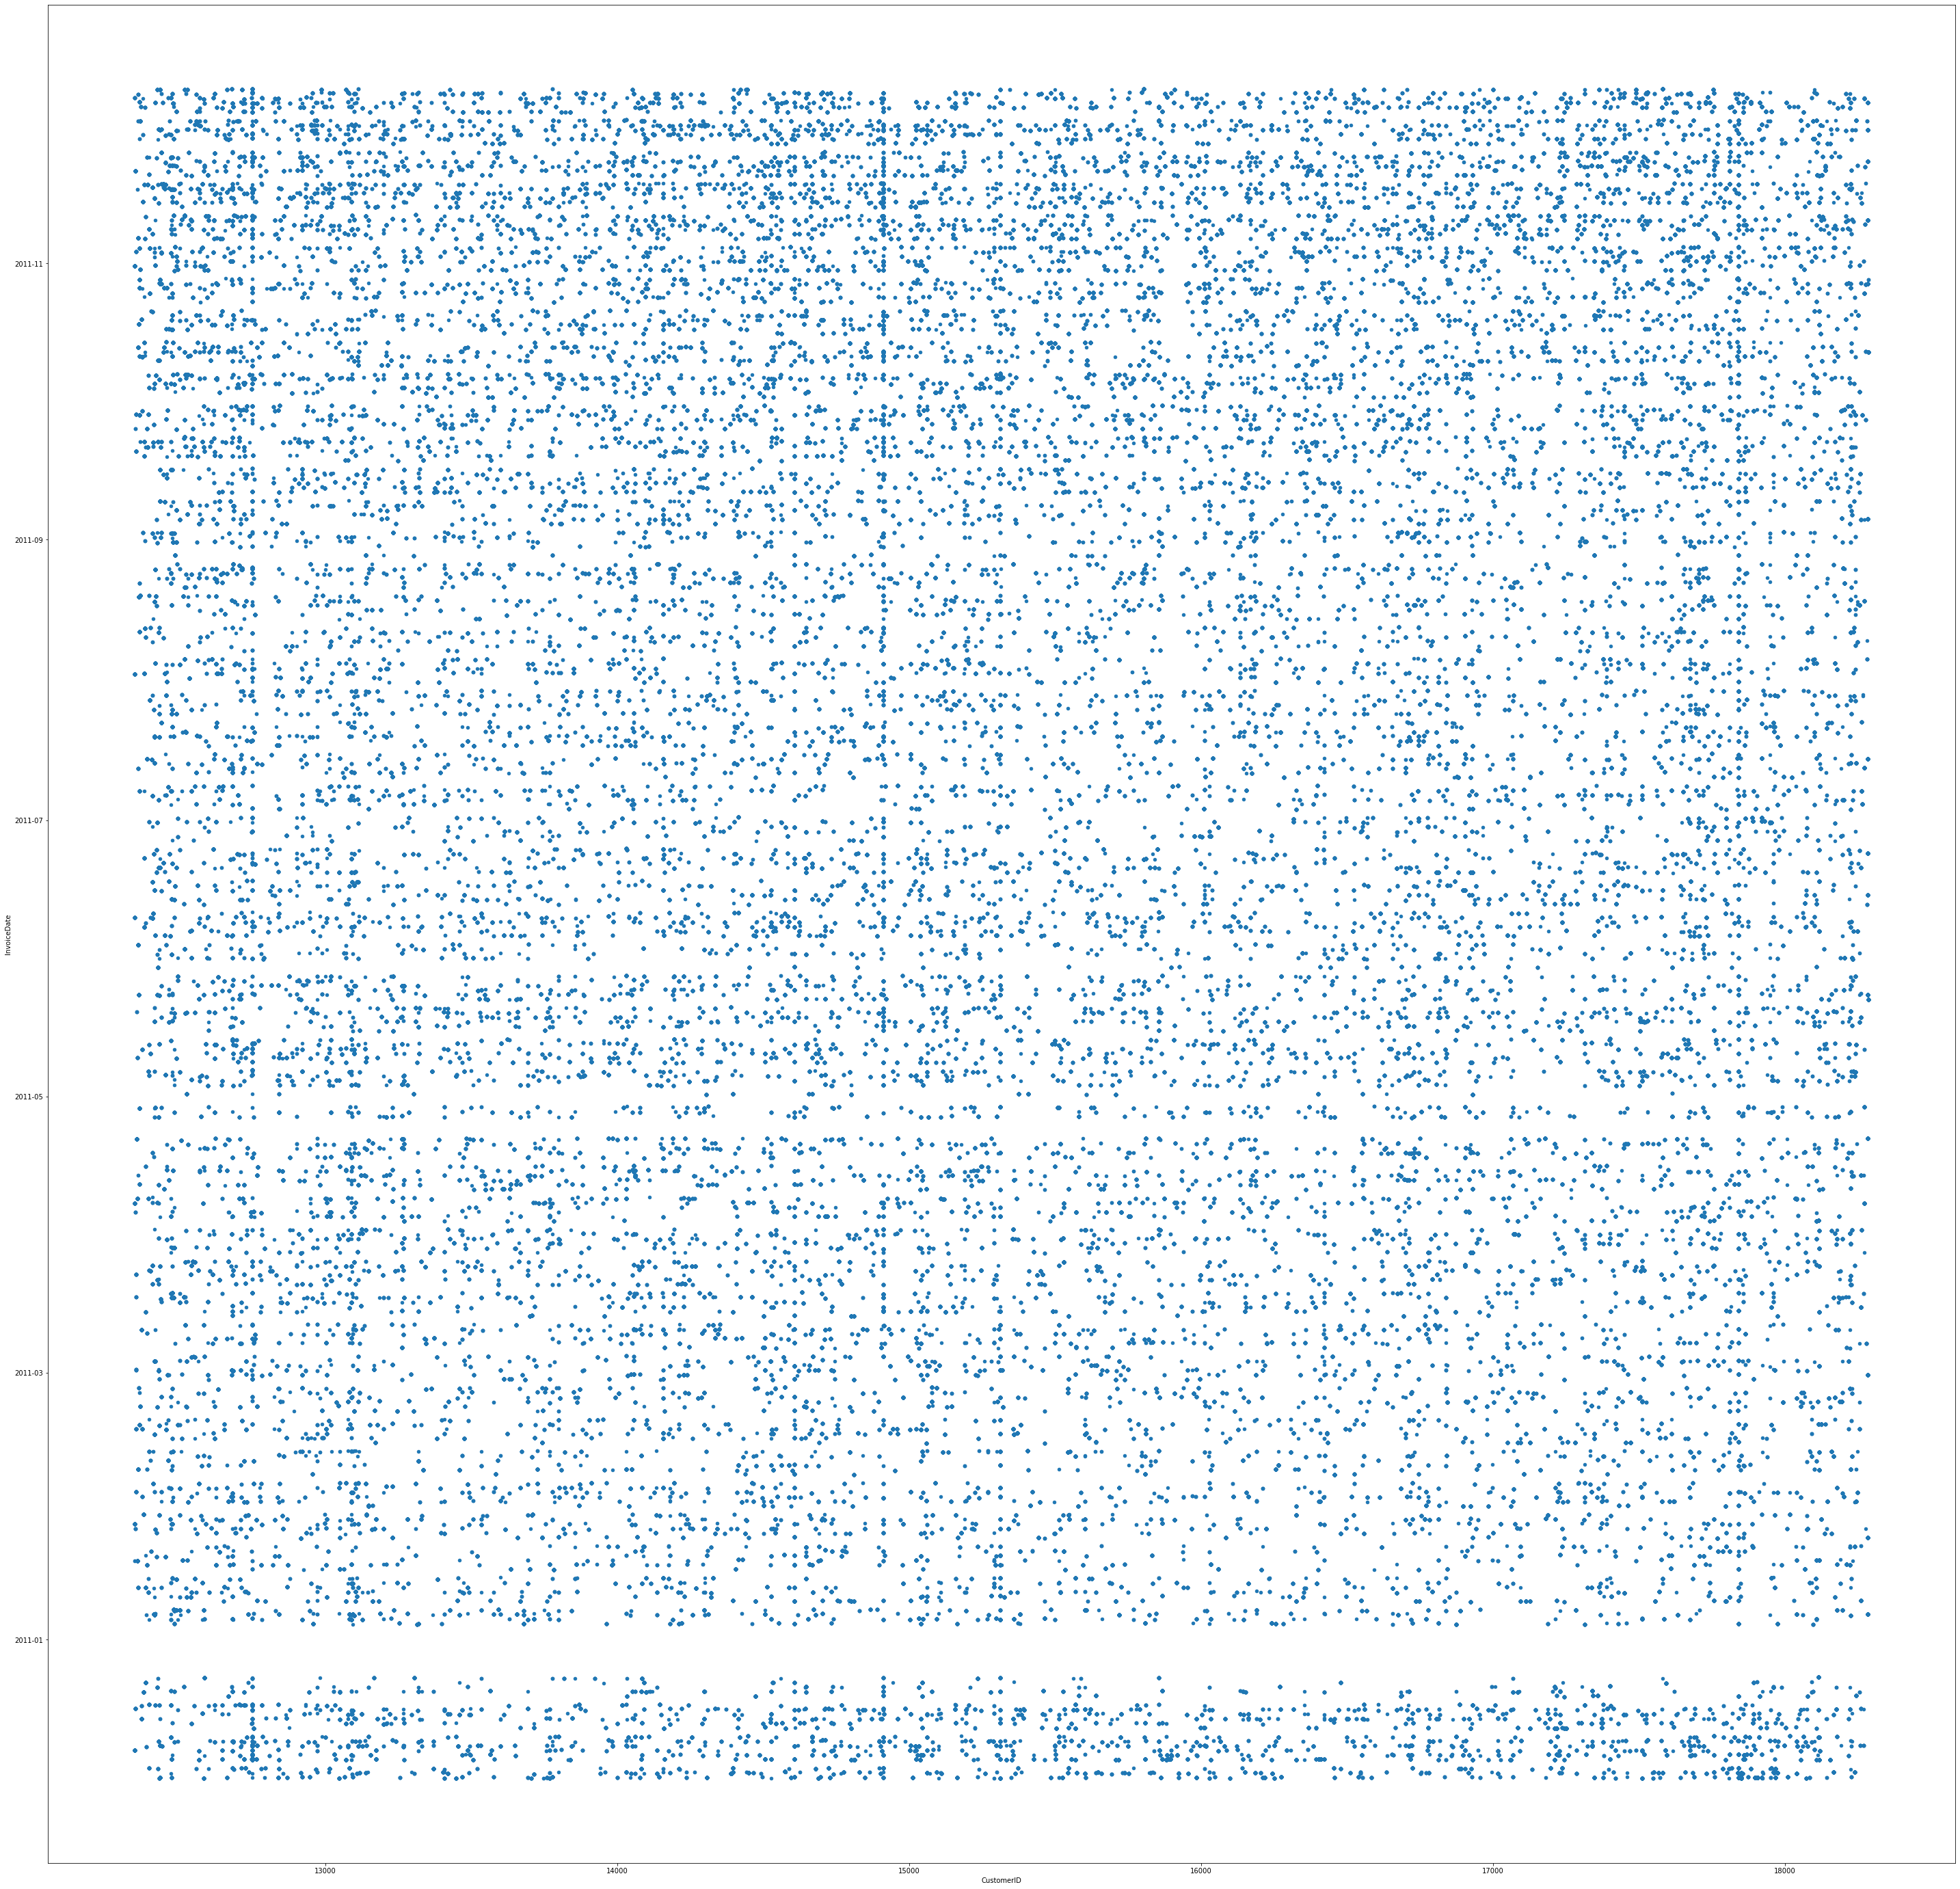

In [18]:
df.plot(kind="scatter",x="CustomerID",y='InvoiceDate',figsize=[50,50])

<AxesSubplot:xlabel='CustomerID', ylabel='Country'>

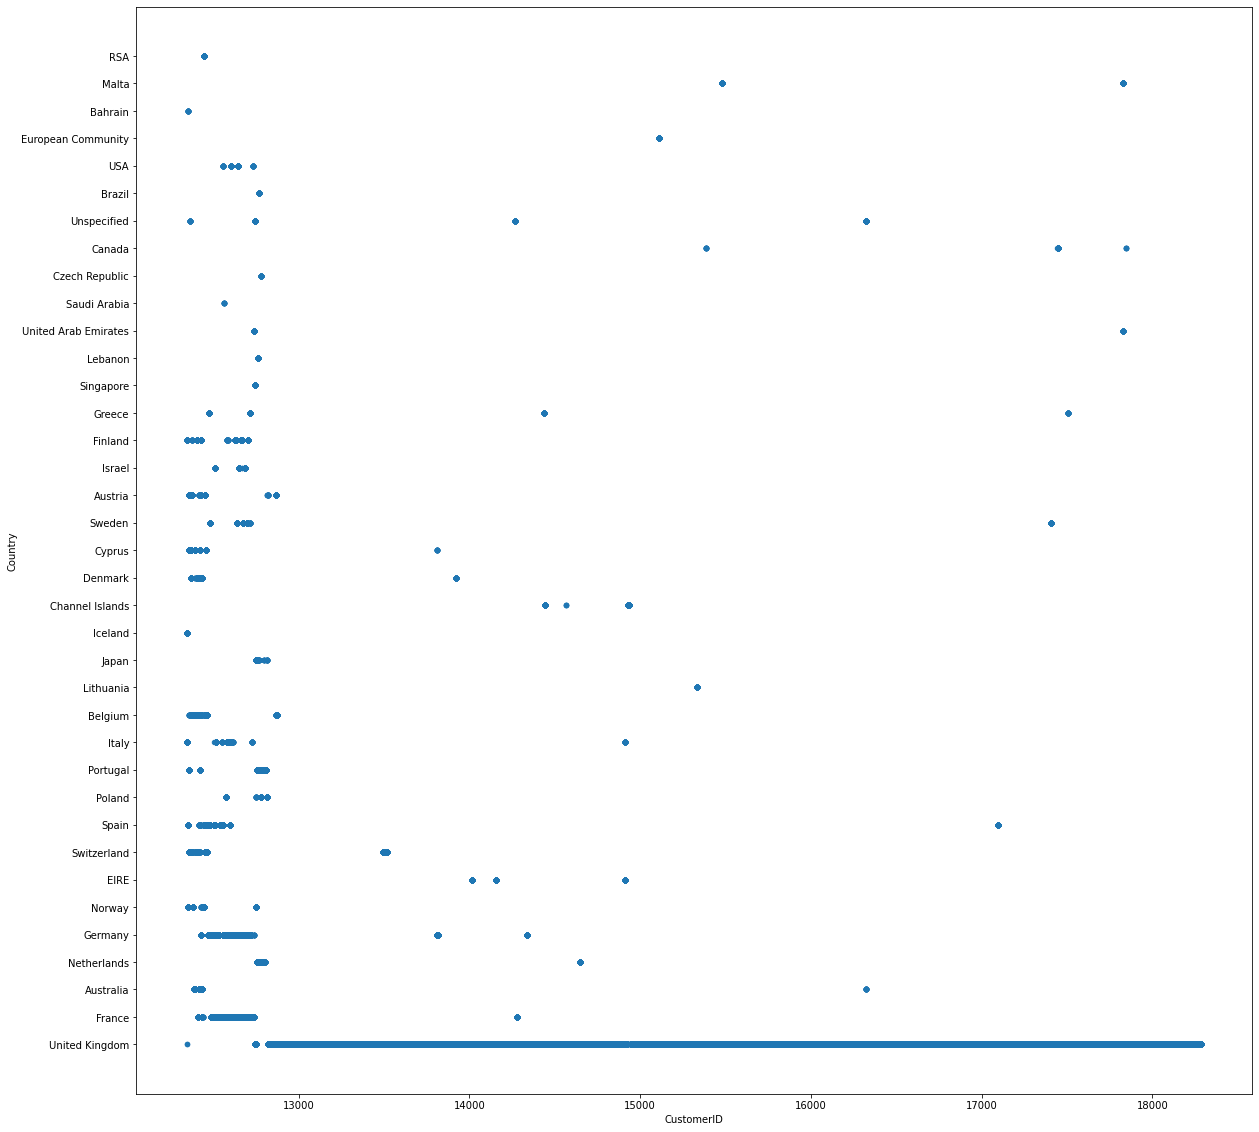

In [19]:
df.plot(kind="scatter",x="CustomerID",y="Country",figsize=[20,20])

<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>

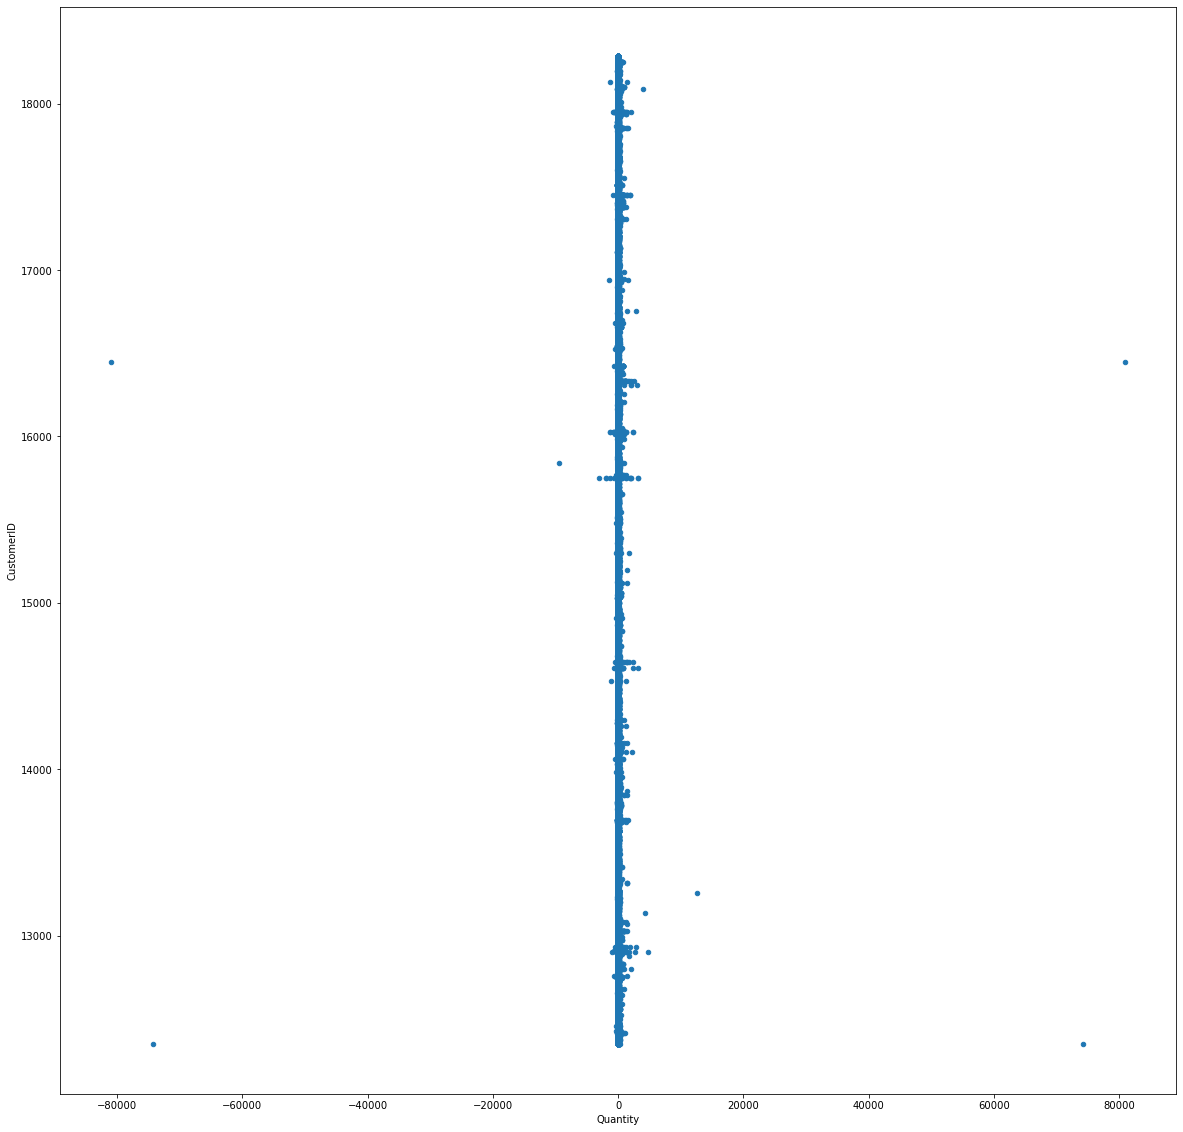

In [20]:
df.plot(kind="scatter",x="Quantity",y="CustomerID",figsize=[20,20])

In [21]:
df.shape

(406829, 9)

In [22]:
index_names = df[ (df['Quantity'] <=0 ) | (df['Quantity'] >= 300 )].index
df.drop(index_names, inplace = True)
df.shape

(396961, 9)

In [23]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [24]:
df.shape

(396961, 9)

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<AxesSubplot:xlabel='TotalPrice', ylabel='CustomerID'>

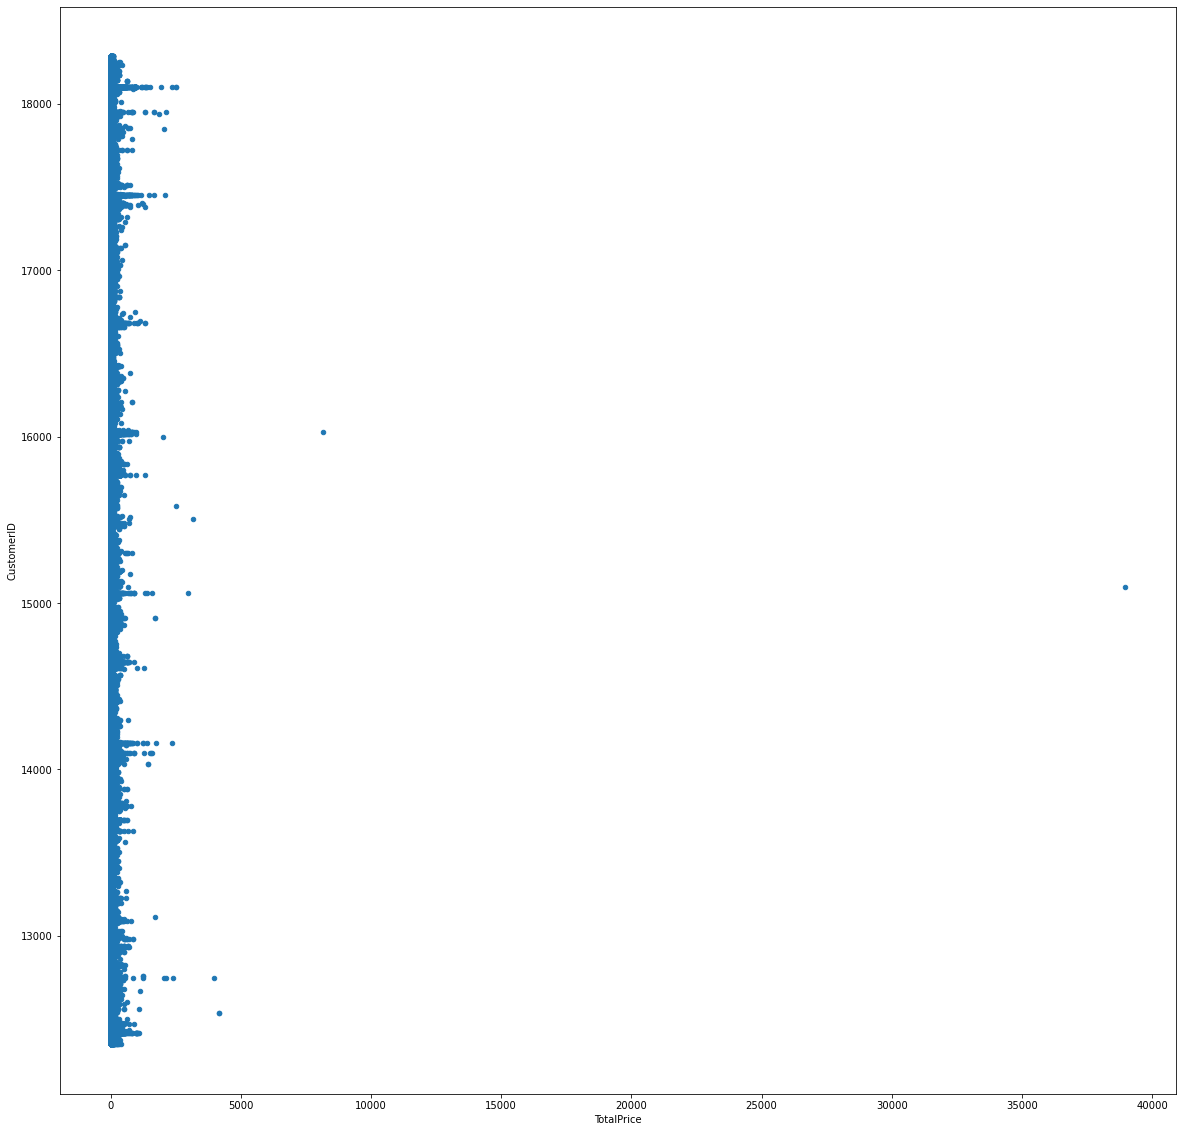

In [26]:
df.plot(kind="scatter",x="TotalPrice",y="CustomerID",figsize=[20,20])

In [27]:
index_names = df[ (df['TotalPrice'] <= 0 ) | (df['TotalPrice'] >= 1100 )].index
df.drop(index_names, inplace = True)
df.shape

(396857, 9)

In [28]:
df2 = pd.DataFrame().assign(CustomerID=df['CustomerID'], Quantity=df['Quantity'],UnitPrice=df['UnitPrice'],TotalPrice=df['TotalPrice'])


In [29]:
df2.head()

,CustomerID,Quantity,UnitPrice,TotalPrice
0,17850.0,6,2.55,15.30
1,17850.0,6,3.39,20.34
2,17850.0,8,2.75,22.00
3,17850.0,6,3.39,20.34
4,17850.0,6,3.39,20.34


In [30]:
scaler = preprocessing.StandardScaler()
X = df2[["CustomerID", "Quantity", "UnitPrice","TotalPrice"]].values
X = scaler.fit_transform(X.astype("float32"))
X

array([[ 1.4931991 , -0.24123439, -0.06362408, -0.10942107],
       [ 1.4931991 , -0.24123439,  0.05765249,  0.01912734],
       [ 1.4931991 , -0.14698343, -0.0347487 ,  0.06146669],
       ...,
       [-1.525924  , -0.33548534,  0.16737889, -0.07626374],
       [-1.525924  , -0.33548534,  0.16737889, -0.07626374],
       [-1.525924  , -0.3826108 ,  0.2828803 , -0.1208986 ]],
      dtype=float32)

Text(0, 0.5, 'Inertia Score')

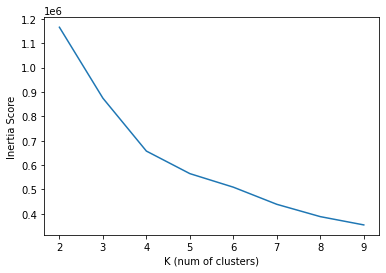

In [31]:
inertias = {}
for k in range(2, 10): 
    kmeans = cluster.KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot()
plt.xlabel("K (num of clusters)")
plt.ylabel("Inertia Score")

In [32]:
k = 4
kmeans = cluster.KMeans(n_clusters=k, random_state = 1)
df2["cluster"] = kmeans.fit_predict(X)

In [33]:
df2.cluster.value_counts()

1    204473
0    182614
2      9721
3        49
Name: cluster, dtype: int64

In [34]:
df2["distance"] = 0.0
for i in range(k):
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)
    cluster_points = X[df2.cluster == i]
    df2["distance"][df2.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
df2.sample(20)

<ipython-input-34-7ddc76100ea9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["distance"][df2.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
<ipython-input-34-7ddc76100ea9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["distance"][df2.cluster == i] = metrics.euclidean_distances(centroid, cluster_points).flatten()
<ipython-input-34-7ddc76100ea9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,CustomerID,Quantity,UnitPrice,TotalPrice,cluster,distance
434986,12490.0,4,3.75,15.00,1,0.873009
386725,14514.0,12,0.55,6.60,1,0.591132
136015,15624.0,12,1.65,19.80,0,0.792247
121041,13089.0,24,0.75,18.00,1,0.895256
350159,13316.0,40,1.65,66.00,1,1.938204
148710,14446.0,6,0.85,5.10,1,0.575012
460103,17052.0,32,0.83,26.56,0,1.246355
55235,14514.0,5,1.25,6.25,1,0.569356
189875,15159.0,10,1.65,16.50,1,0.763070
465989,17044.0,48,4.25,204.00,2,3.317512


In [35]:
kmeans.inertia_

657432.4375

In [36]:
kmeans.cluster_centers_

array([[ 9.1755146e-01, -1.7495432e-01, -3.2665841e-02, -1.6883658e-01],
       [-8.1207627e-01, -7.2577134e-02,  1.3692772e-02, -5.7726551e-02],
       [-1.3814029e-01,  4.8174920e+00, -8.1670964e-03,  4.3298492e+00],
       [-7.4800479e-01, -4.7590005e-01,  6.6146507e+01,  1.1405532e+01]],
      dtype=float32)

In [37]:
kmeans.n_iter_

9

In [38]:
kmeans.cluster_centers_

array([[ 9.1755146e-01, -1.7495432e-01, -3.2665841e-02, -1.6883658e-01],
       [-8.1207627e-01, -7.2577134e-02,  1.3692772e-02, -5.7726551e-02],
       [-1.3814029e-01,  4.8174920e+00, -8.1670964e-03,  4.3298492e+00],
       [-7.4800479e-01, -4.7590005e-01,  6.6146507e+01,  1.1405532e+01]],
      dtype=float32)

In [39]:
cluster = df2["cluster"]
df = df.join(cluster)

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0


In [41]:
distance = df2["distance"]
df = df.join(distance)

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,cluster,distance
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,0.583311
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.615834
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,0.620642
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.615834
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,0.615834


In [43]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,cluster,distance
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,1,0.812287
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,1,0.756838
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,0.776313
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,1,0.776313
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,1,0.825925


In [44]:
df.nunique()

InvoiceNo       18325
StockCode        3663
Description      3875
Quantity          164
InvoiceDate     17105
UnitPrice         406
CustomerID       4319
Country            37
TotalPrice       2576
cluster             4
distance       150065
dtype: int64

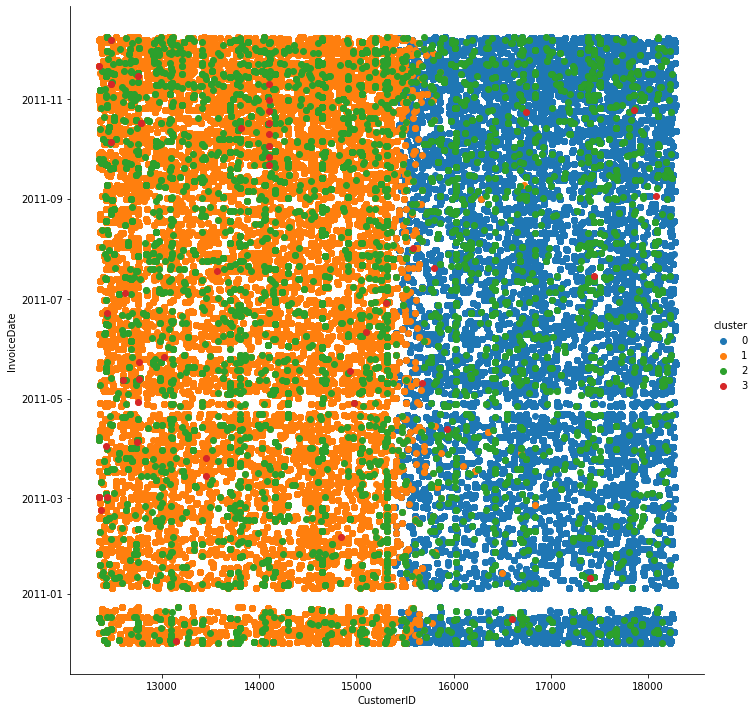

In [45]:
sns.FacetGrid(df, hue="cluster", height=10).map(plt.scatter, "CustomerID", "InvoiceDate").add_legend()

In [46]:
df1=df.drop(["StockCode","InvoiceNo","Description","UnitPrice","Country"],axis=1)
df1.head()

,Quantity,InvoiceDate,CustomerID,TotalPrice,cluster,distance
0,6,2010-12-01 08:26:00,17850.0,15.30,0,0.583311
1,6,2010-12-01 08:26:00,17850.0,20.34,0,0.615834
2,8,2010-12-01 08:26:00,17850.0,22.00,0,0.620642
3,6,2010-12-01 08:26:00,17850.0,20.34,0,0.615834
4,6,2010-12-01 08:26:00,17850.0,20.34,0,0.615834


In [47]:
import plotly
import plotly.graph_objs as go


#Set marker properties
markersize = df1['distance']/12
markercolor = df1['Quantity']
markershape = df1['cluster'].replace(3,"cross",).replace(2,"circle").replace(1,"diamond").replace(0,"circle-open")


#Make Plotly figure
fig1 = go.Scatter3d(x=df1['CustomerID'],
                    y=df1['InvoiceDate'],
                    z=df1['TotalPrice'],
                    marker=dict(size=markersize,
                                color=markercolor,
                                symbol=markershape,
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="CustomerID"),
                                yaxis=dict( title="InvoiceDate"),
                                zaxis=dict(title="TotalPrice")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("6DPlot.html"))


'6DPlot.html'